In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

In [ ]:
cd "/content/drive/MyDrive/NLP"

/content/drive/MyDrive/NLP


In [ ]:
os.getcwd()

'/content/drive/MyDrive/NLP'

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
!pip install arabert
!pip install transformers
!pip install pyarabic
!pip install farasapy
!pip install emoji
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import tensorflow as tf
import pyarabic
from arabert.preprocess import ArabertPreprocessor
from transformers import AutoTokenizer, AutoModel
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 179 kB 35.0 MB/s 
     |████████████████████████████████| 184 kB 64.4 MB/s 
     |████████████████████████████████| 126 kB 64.6 MB/s 
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186469 sha256=0cc90b7985e5af2faf26e8533e3e399b71a22eae1c3d08d8b64c9e27687dd6c6
  Stored in directory: /root/.cache/pip/wheels/e4/61/e7/2fc1ac8f306848fc66c6c013ab511f0a39ef4b1825b11363b2
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 32.4 MB/s 
     |████████████████████████████████| 7.6 MB 52.0 MB/s 
     |████████████████████████████████| 163 kB 73.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/col

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/NLP/baseD.xlsx')
df.head()

,texte,label
0,الاسم قيس سعيد المهنه يسربي لشعب الفرارات الك...,hate
1,بنات تونس يمارسن الرياضه والتجميل وحريه اللب...,hate
2,فما نوعيه متع ذكور توانسه تلوم نوعيه لبس البن...,hate
3,ووه ديني شنوا شبيها تحكي يجدها و الا تفدلك ...,hate
4,تكون تعيش الجحيم و تصير متعود عليهالتوانسه مب...,hate


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   texte   10000 non-null  object
 1   label   10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [ ]:
df['label'] = df['label'].apply(lambda x: 0 if x == 'normal' else x)
df['label'] = df['label'].apply(lambda x: 1 if x == 'hate' else x)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   texte   10000 non-null  object
 1   label   10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


0    6336
1    3664
Name: label, dtype: int64


Text(0.5, 1.0, 'Distribution des labels')

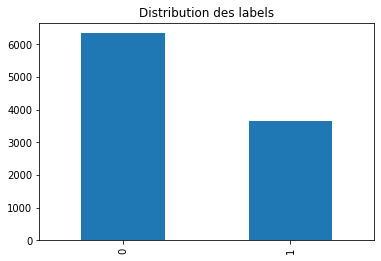

In [ ]:
print(df['label'].value_counts())
df['label'].value_counts().plot.bar()
plt.title('Distribution des labels')

In [ ]:
df['label'] = df['label'].astype(int)

### **Data Preparation**

In [ ]:
from arabert.preprocess import ArabertPreprocessor
from transformers import AutoTokenizer, AutoModelForMaskedLM

model_name="aubmindlab/bert-base-arabertv02"
arabert_prep = ArabertPreprocessor(model_name=model_name)


tokenizer = AutoTokenizer.from_pretrained(model_name,do_lower_case=False)

text_processed = arabert_prep.preprocess(df['texte'])

tokenizer.tokenize(text_processed)

Downloading:   0%|          | 0.00/381 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/384 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/825k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.64M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

['0',
 'الاسم',
 'قيس',
 'سعيد',
 'المهن',
 '##ه',
 'يسر',
 '##بي',
 'لشعب',
 'الفرار',
 '##ات',
 'الك',
 '.',
 '.',
 '1',
 'بنات',
 'تونس',
 'يمارس',
 '##ن',
 'الرياض',
 '##ه',
 'والتجميل',
 'وحري',
 '##ه',
 'اللب',
 '.',
 '.',
 '2',
 'فما',
 'نوعي',
 '##ه',
 'متع',
 'ذكور',
 'توا',
 '##نس',
 '##ه',
 'تلو',
 '##م',
 'نوعي',
 '##ه',
 'لبس',
 'البن',
 '.',
 '.',
 '3',
 'وو',
 '##ه',
 'ديني',
 'شنوا',
 'شبيها',
 'تحكي',
 'يجدها',
 'و',
 'الا',
 'تف',
 '##دل',
 '##ك',
 '.',
 '.',
 '4',
 'تكون',
 'تعيش',
 'الجحيم',
 'و',
 'تصير',
 'متع',
 '##ود',
 'عليها',
 '##لت',
 '##وان',
 '##سه',
 'مب',
 '.',
 '.',
 '.',
 '.',
 '99',
 '##95',
 'شباب',
 'الاسلام',
 'اح',
 '##فاد',
 'الرسول',
 'الصل',
 '##اه',
 'السلام',
 'اح',
 '##فاد',
 '.',
 '.',
 '99',
 '##96',
 'جاه',
 '##ل',
 'والله',
 '99',
 '##97',
 'مدا',
 '##م',
 'بت',
 '##وكس',
 'ه',
 '##ه',
 '99',
 '##98',
 'تونسي',
 'بلا',
 '##ص',
 '##ه',
 'الاي',
 '##فوا',
 '##ري',
 'كا',
 'يصير',
 '##لو',
 'الشي',
 'السبب',
 'تط',
 '.',
 '.',
 '99',
 '##99

In [ ]:
X_input_ids = np.zeros((len(df), 256))
X_attn_masks = np.zeros((len(df), 256))

In [ ]:
X_input_ids.shape

(10000, 256)

In [ ]:
def generate_training_data(df, ids, masks, tokenizer):
    for i, text in tqdm(enumerate(df['texte'])):
        tokenized_text = tokenizer.encode_plus(
            text,
            max_length=256, 
            truncation=True, 
            padding='max_length', 
            add_special_tokens=True,
            return_tensors='tf'
        )
        ids[i, :] = tokenized_text.input_ids
        masks[i, :] = tokenized_text.attention_mask
    return ids, masks

In [ ]:
X_input_ids, X_attn_masks = generate_training_data(df, X_input_ids, X_attn_masks, tokenizer)

0it [00:00, ?it/s]

In [ ]:
X_input_ids

array([[2.0000e+00, 7.2850e+03, 2.4766e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 1.2689e+04, 3.8990e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 3.6710e+03, 4.2450e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [2.0000e+00, 7.1070e+03, 2.0100e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 2.3330e+04, 2.0890e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 2.3836e+04, 1.2430e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [ ]:
labels = np.zeros((len(df), 2))
labels.shape

(10000, 2)

In [ ]:
labels[np.arange(len(df)), df['label'].values] = 1 # one-hot encoded target tensor

In [ ]:
labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
# creating a data pipeline using tensorflow dataset utility, creates batches of data for easy loading...
dataset = tf.data.Dataset.from_tensor_slices((X_input_ids, X_attn_masks, labels))
dataset.take(1) # one sample data

<TakeDataset element_spec=(TensorSpec(shape=(256,), dtype=tf.float64, name=None), TensorSpec(shape=(256,), dtype=tf.float64, name=None), TensorSpec(shape=(2,), dtype=tf.float64, name=None))>

In [ ]:
def SentimentDatasetMapFunction(input_ids, attn_masks, labels):
    return {
        'input_ids': input_ids,
        'attention_mask': attn_masks
    }, labels

In [ ]:
dataset = dataset.map(SentimentDatasetMapFunction) # converting to required format for tensorflow dataset 

In [ ]:
dataset.take(1)

<TakeDataset element_spec=({'input_ids': TensorSpec(shape=(256,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(256,), dtype=tf.float64, name=None)}, TensorSpec(shape=(2,), dtype=tf.float64, name=None))>

In [ ]:
dataset = dataset.shuffle(10000).batch(16, drop_remainder=True) # batch size, drop any left out tensor

In [ ]:
len(dataset)

625

In [ ]:
dataset.take(1)

<TakeDataset element_spec=({'input_ids': TensorSpec(shape=(16, 256), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(16, 256), dtype=tf.float64, name=None)}, TensorSpec(shape=(16, 2), dtype=tf.float64, name=None))>

In [ ]:
train_size = int((len(df)//16)*0.8) 
test_size = int((len(df)//16)*0.15) 
val_size = int((len(df)//16)*0.15) 


In [ ]:
train_dataset = dataset.take(train_size)
test_dataset = dataset.skip(train_size)
val_dataset = test_dataset.skip(test_size)
test_dataset = test_dataset.take(test_size)


In [ ]:
print("train length", len(train_dataset))
print("test length", len(test_dataset))
print("validation length", len(val_dataset))

train length 500
test length 93
validation length 32


### **Model**

In [ ]:
from transformers import TFBertModel, AutoModel,AutoModelForMaskedLM

model = TFBertModel.from_pretrained("aubmindlab/bert-base-arabertv02")

Downloading:   0%|          | 0.00/742M [00:00<?, ?B/s]

Some layers from the model checkpoint at aubmindlab/bert-base-arabertv02 were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at aubmindlab/bert-base-arabertv02.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
# defining 2 input layers for input_ids and attn_masks


input_ids = tf.keras.layers.Input(shape=(256,), name='input_ids', dtype='int32')
attn_masks = tf.keras.layers.Input(shape=(256,), name='attention_mask', dtype='int32')
bert_embds = model.bert([input_ids,attn_masks])[1] # 0 -> activation layer (3D), 1 -> pooled output layer (2D)
intermediate_layer = tf.keras.layers.Dense(512, activation='relu', name='intermediate_layer')(bert_embds)
batch = tf.keras.layers.BatchNormalization()(intermediate_layer)
drop = tf.keras.layers.Dropout(0.2)(batch)
output_layer = tf.keras.layers.Dense(2, activation='sigmoid', name='output_layer')(drop) # softmax -> calcs probs of classes

sentiment_model = tf.keras.Model(inputs=[input_ids, attn_masks], outputs=output_layer)
sentiment_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 256)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 256)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  135193344   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 256,                                           

In [ ]:
cd '/content/drive/MyDrive/deux_class_arabert_normalisation'

/content/drive/MyDrive/deux_class_arabert_normalisation


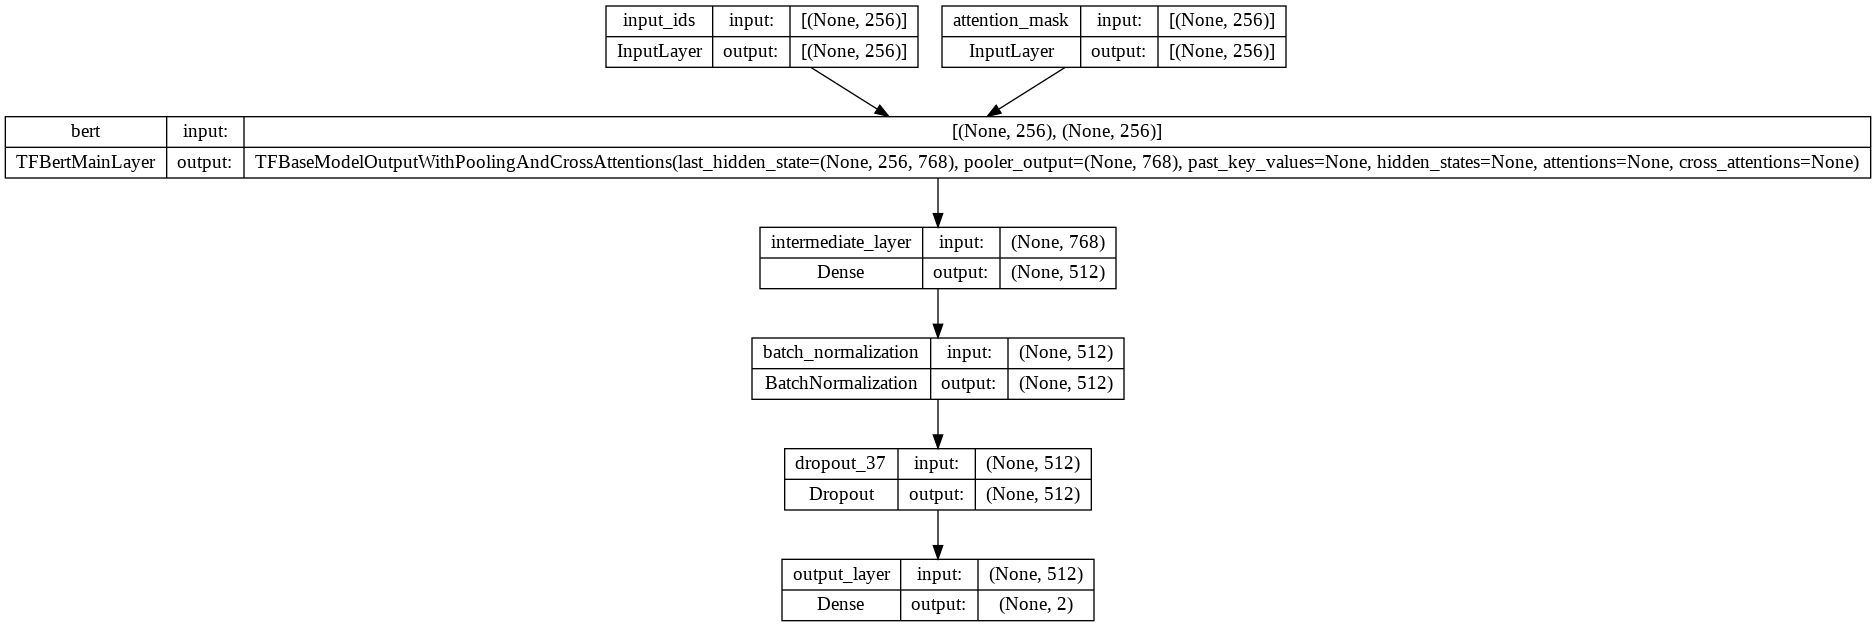

In [ ]:
keras.utils.plot_model(sentiment_model, "my_first_model.png",show_shapes=True)
# les formes d'entrée et de sortie de chaque couche dans le graphique tracé
#Un « graphique de couches » est une image mentale intuitive pour un modèle d'apprentissage en profondeur, 
#et l'API fonctionnelle est un moyen de créer des modèles qui reflètent étroitement cela.

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

sentiment_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5, decay=1e-6),loss='binary_crossentropy',
                        metrics=[tf.keras.metrics.CategoricalAccuracy('accuracy'), f1_m,precision_m, recall_m])

In [ ]:
history = sentiment_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.001)])



Epoch 1/10
500/500 [==============================] - 437s 850ms/step - loss: 0.6236 - accuracy: 0.6936 - f1_m: 0.6746 - precision_m: 0.6804 - recall_m: 0.6731 - val_loss: 0.3834 - val_accuracy: 0.8340 - val_f1_m: 0.8316 - val_precision_m: 0.8145 - val_recall_m: 0.8516
Epoch 2/10
500/500 [==============================] - 422s 844ms/step - loss: 0.4507 - accuracy: 0.8073 - f1_m: 0.7994 - precision_m: 0.8022 - recall_m: 0.7987 - val_loss: 0.3026 - val_accuracy: 0.8789 - val_f1_m: 0.8808 - val_precision_m: 0.8648 - val_recall_m: 0.8984
Epoch 3/10
500/500 [==============================] - 422s 844ms/step - loss: 0.3652 - accuracy: 0.8561 - f1_m: 0.8504 - precision_m: 0.8508 - recall_m: 0.8514 - val_loss: 0.2142 - val_accuracy: 0.9238 - val_f1_m: 0.9225 - val_precision_m: 0.9276 - val_recall_m: 0.9180
Epoch 4/10
500/500 [==============================] - 422s 844ms/step - loss: 0.2870 - accuracy: 0.8925 - f1_m: 0.8886 - precision_m: 0.8888 - recall_m: 0.8895 - val_loss: 0.1507 - val_accur

In [ ]:
sentiment_model.save("/content/drive/MyDrive/deux_class_arabert_normalisation")

**Evaluation du modele**

In [ ]:
sentiment_model.evaluate(test_dataset)

93/93 [==============================] - 26s 276ms/step - loss: 0.0121 - accuracy: 0.9960 - f1_m: 0.9963 - precision_m: 0.9966 - recall_m: 0.9960


[0.012089705094695091,
 0.9959677457809448,
 0.9962929487228394,
 0.9966397881507874,
 0.9959677457809448]

In [ ]:
model = keras.models.load_model("/content/drive/MyDrive/deux_class_arabert_normalisation",custom_objects={'f1':f1_m,
                                    'recall':recall_m,
                                    'precision_m':precision_m},compile=False)

In [ ]:
evaluation_results = sentiment_model.evaluate(test_dataset,return_dict=True)
evaluation_results

93/93 [==============================] - 27s 286ms/step - loss: 0.0032 - accuracy: 0.9987 - f1_m: 0.9987 - precision_m: 0.9987 - recall_m: 0.9987


{'loss': 0.003167905146256089,
 'accuracy': 0.9986559152603149,
 'f1_m': 0.9986559152603149,
 'precision_m': 0.9986559152603149,
 'recall_m': 0.9986559152603149}

**Courbe d'apprentissage données d'entrainement**

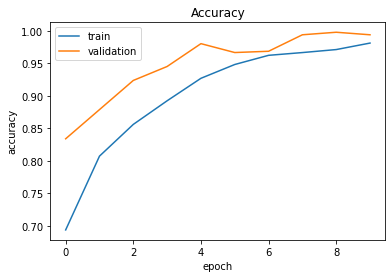

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show();

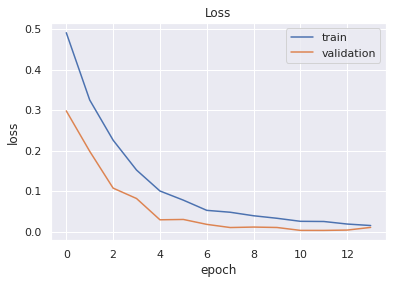

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show();

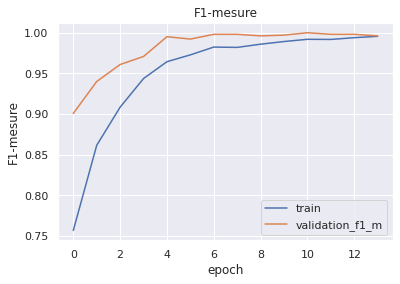

In [ ]:
plt.title('F1-mesure')
plt.plot(history.history['f1_m'], label='train')
plt.plot(history.history['val_f1_m'], label='validation_f1_m')
plt.ylabel('F1-mesure')
plt.xlabel('epoch')
plt.legend()
plt.show();

**Courbe d'apprentissage données de test**

### **Prediction**

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/NLP/Deux_classes", custom_objects={'f1':f1_m,
                                    'recall':recall_m,
                                    'precision_m':precision_m},compile=True)

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("aubmindlab/bert-base-arabertv02",do_lower_case=False)
arabert_prep = ArabertPreprocessor("aubmindlab/bert-base-arabertv02")

def prepare_data(input_text, tokenizer):
    text_processed = arabert_prep.preprocess(input_text)
    token = tokenizer.encode_plus(
        input_text,
        max_length=256, 
        truncation=True, 
        padding='max_length', 
        add_special_tokens=True,
        return_tensors='tf'
    )
    return {
        'input_ids': tf.cast(token.input_ids, tf.float64),
        'attention_mask': tf.cast(token.attention_mask, tf.float64)
    }

def make_prediction(model, processed_data, classes=['normal','hate']):
    probs = model.predict(processed_data)[0]
    return classes[np.argmax(probs)]

In [ ]:
input_text = input('Entrer votre phrase: ')
processed_data = prepare_data(input_text, tokenizer)
result = make_prediction(model, processed_data=processed_data)
print(f"Predicted Sentiment: {result}")
